In [1]:
# K Nearest Neighbours

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the dataset

In [7]:
df = pd.read_csv(f'/content/Classified_Data', index_col=0)

In [8]:
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [11]:
# Applying Standardization

In [10]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
scaler.fit(df.drop('TARGET CLASS', axis=1))

StandardScaler()

In [15]:
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))

In [16]:
scaled_features

array([[-0.12354188,  0.18590747, -0.91343069, ..., -1.48236813,
        -0.9497194 , -0.64331425],
       [-1.08483602, -0.43034845, -1.02531333, ..., -0.20224031,
        -1.82805088,  0.63675862],
       [-0.78870217,  0.33931821,  0.30151137, ...,  0.28570652,
        -0.68249379, -0.37784986],
       ...,
       [ 0.64177714, -0.51308341, -0.17920486, ..., -2.36249443,
        -0.81426092,  0.11159651],
       [ 0.46707241, -0.98278576, -1.46519359, ..., -0.03677699,
         0.40602453, -0.85567   ],
       [-0.38765353, -0.59589427, -1.4313981 , ..., -0.56778932,
         0.3369971 ,  0.01034996]])

In [17]:
df.columns

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ',
       'TARGET CLASS'],
      dtype='object')

In [18]:
df.columns[:-1]

Index(['WTT', 'PTI', 'EQW', 'SBI', 'LQE', 'QWG', 'FDJ', 'PJF', 'HQE', 'NXJ'], dtype='object')

In [19]:
df_featured = pd.DataFrame(scaled_features, columns=df.columns[:-1])

In [20]:
df_featured.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [21]:
# Splitting the Dataset into Train and Test

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
df['TARGET CLASS']

,TARGET CLASS
0,1
1,0
2,0
3,1
4,1
...,...
995,1
996,0
997,1
998,1


In [25]:
X_train, X_test, y_train, y_test =  train_test_split(scaled_features,df['TARGET CLASS'], test_size=0.30)

In [26]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

In [29]:
knn = KNeighborsClassifier(n_neighbors=5)

In [30]:
knn

KNeighborsClassifier()

In [31]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [32]:
knn_pred = knn.predict(X_test)

In [33]:
knn_pred

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1])

In [34]:
# Model Evaluations

In [35]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

In [36]:
confusion_matrix(y_test, knn_pred)

array([[134,  11],
       [ 11, 144]])

In [38]:
classification_report(y_test, knn_pred)

'              precision    recall  f1-score   support\n\n           0       0.92      0.92      0.92       145\n           1       0.93      0.93      0.93       155\n\n    accuracy                           0.93       300\n   macro avg       0.93      0.93      0.93       300\nweighted avg       0.93      0.93      0.93       300\n'

In [39]:
# Providing KNN Value using Loop

In [50]:
accuracy_value = []

for val in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=val)
  score = cross_val_score(knn, df_featured, df['TARGET CLASS'], cv=10)
  accuracy_value.append(score.mean())

In [51]:
error_value = []

for val in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=val)
  score = cross_val_score(knn, df_featured, df['TARGET CLASS'], cv=10)
  error_value.append(1-score.mean())

In [52]:
error_value = []

for val in range(1,50):
  knn = KNeighborsClassifier(n_neighbors=val)
  knn.fit(X_train, y_train)
  knn_pred_val = knn.predict(X_test)
  error_value.append(np.mean(knn_pred_val != y_test))

In [53]:
# Plotting

In [55]:
# Accuracy vs K Value

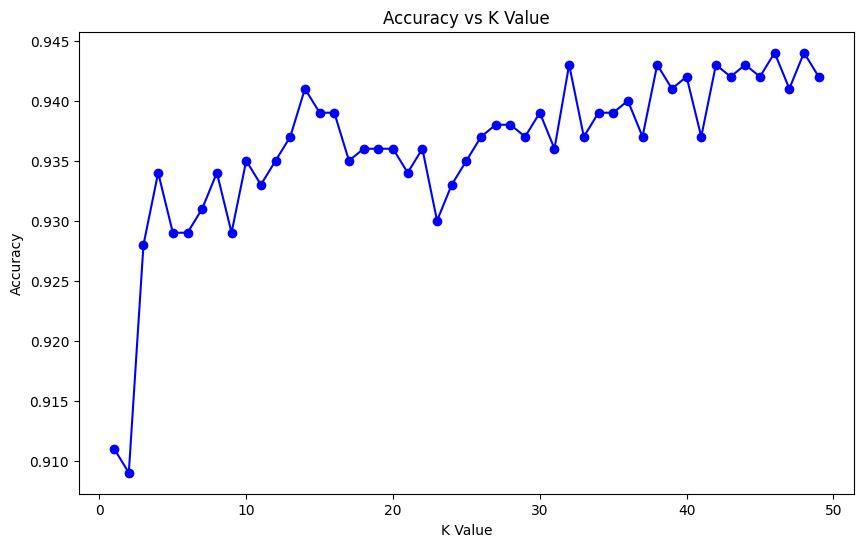

In [54]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), accuracy_value, color="blue",marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()

In [56]:
# Error vs K Value

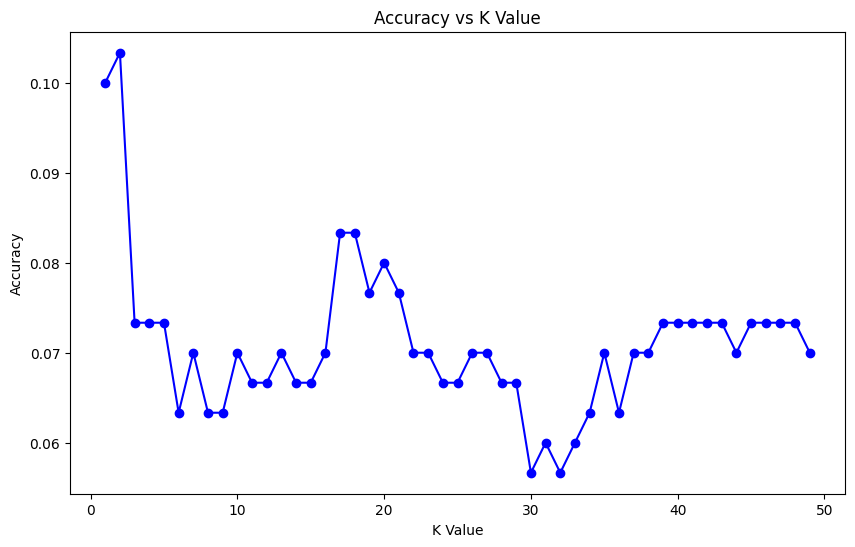

In [57]:
plt.figure(figsize=(10,6))
plt.plot(range(1,50), error_value, color="blue",marker='o')
plt.title("Accuracy vs K Value")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.show()